**Aequitas**

Applying Aequitas progammatically is a three step process represented by three python classes: 

`Group()`: Define groups 

`Bias()`: Calculate disparities

`Fairness()`: Assert fairness

Each class builds on the previous one expanding the output DataFrame.




**The Aequitas tool always requires a `score` column and requires a binary `label_value` column for supervised metrics**, (i.e., False Discovery Rate, False Positive Rate, False Omission Rate, and False Negative Rate).

https://github.com/dssg/aequitas


## Data preprocessing

In [ ]:
!git clone https://github.com/dssg/aequitas.git

In [ ]:
!pip install aequitas

     |████████████████████████████████| 2.6MB 34.5MB/s 
  Created wheel for xhtml2pdf: filename=xhtml2pdf-0.2.2-cp36-none-any.whl size=231059 sha256=ed299c376168a61b76ec34ef6980dac1bd7618c65ddc3f5fcab9c4cda76fecb5
  Stored in directory: /root/.cache/pip/wheels/37/e9/d9/8ef244092a2b3b004ab197f5c707973c8ce2082fa75fb6ce6a
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=cf17a614e491bc92bcf8575a0142edb770cdcac53870efe23490c2944519d565
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for tabulate: filename=tabulate-0.8.2-cp36-none-any.whl size=23535 sha256=4d74ea276c66a0a79241090a5f7329624c7061f4aefcf30949ce2556c62cf712
  Stored in directory: /root/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
  Created wheel for Flask-Bootstrap: filename=Flask_Bootstrap-3.3.7.1-cp36-none-any.whl size=460123 sha256=1872f8d244cfc311a92c3f1f2a389c3dab83766adc

In [ ]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/lunit demo-gt_pneumonia.csv")
df.head()

,PatientName,Procedure,PatientAge,PatientSex,label_value,label_covid,score,score_covid,entity_id
0,COVID-TEST-CXR-788,PORTABLE X - RAY - CHEST- AP,051Y,M,1,1,53.6,50,1
1,COVID-TEST-CXR-327,PORTABLE X - RAY - CHEST- PA,055Y,M,1,1,34.5,25,2
2,COVID-TEST-CXR-281,PORTABLE X - RAY - CHEST- AP,059Y,F,1,1,64.1,50,3
3,COVID-TEST-CXR-260,PORTABLE X - RAY - CHEST- AP,065Y,F,1,1,73,50,4
4,COVID-TEST-CXR-255,X-RAY CHEST ( PA VIEW ),019Y,M,0,1,24.7,25,5


In [ ]:
df = pd.read_csv("/content/lunit demo-gt_pneumonia.csv")

threshold = 35

for a in range(len(df['score'])):
  b = df['score'][a]
  try:
    
    if (int(float(b)) >= int(float(threshold))) == True:
          c = 0
          df['score'][a] = c

    elif (int(float(b)) <= int(float(threshold))) == True:
          c = 1
          df['score'][a] = c
  except:
    print(b)
    df['score'][a] = 0

#df['score'][:50]

-
-
-


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for a in range(len(df['Procedure'])):
  b = df['Procedure'][a]
  try:
      if ('ANY OTHER' in b) == True:
        c = 'PA' #'other'
        df['Procedure'][a] = c

      elif ('AP' in b) == True:
        c = 'AP'
        df['Procedure'][a] = c

      elif ('PA'in b) == True:
        c = 'PA'
        df['Procedure'][a] = c

  except:
        c = 'PA' #'other'
        df['Procedure'][a] = c
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for a in range(len(df['PatientAge'])):
  b = df['PatientAge'][a]
  try:
      if ('Y' in b) == True:
        c = b[1:3]
        df['PatientAge'][a] = c

  except:
      c = 0
      df['PatientAge'][a] = c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
limit1 = 18
limit2 = 50
limit = 51

for a in range(len(df['PatientAge'])):
  b = df['PatientAge'][a]
  try:
    if int(b) <= limit1:
          c = 'child'
          df['PatientAge'][a] = c

    elif int(b) <= limit2:
          c = 'adult'
          df['PatientAge'][a] = c

    else:
          c = 'old_age'
          df['PatientAge'][a] = c

  except:
      c = 'adult' #'none'
      df['PatientAge'][a] = c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

In [ ]:
for a in range(len(df['PatientSex'])):
  b = df['PatientSex'][a]
  try:
      if ('F' in b) == True:
        c = 'F'
        df['PatientSex'][a] = c

      elif ('M' in b) == True:
        c = 'M'
        df['PatientSex'][a] = c
      else:
        c = 'other'
        df['PatientSex'][a] = c

  except:
      c = 'other'
      df['PatientSex'][a] = c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages

In [ ]:
df['label_value'] = df['label_value'].astype(int)
df['score'] = df['score'].astype(int)
#df['label_value'] = df['label_value'].astype(str)
#df['score'] = df['score'].astype(str)
'''df['PatientAge'] = df['PatientAge'].astype(str)
df['PatientSex'] = df['PatientSex'].astype(str)
df['PatientName'] = df['PatientAge'].astype(str)
df['PatientSex'] = df['PatientSex'].astype(str)

df['Procedure'] = df['Procedure'].astype(str)'''

"df['PatientAge'] = df['PatientAge'].astype(str)\ndf['PatientSex'] = df['PatientSex'].astype(str)\ndf['PatientName'] = df['PatientAge'].astype(str)\ndf['PatientSex'] = df['PatientSex'].astype(str)\n\ndf['Procedure'] = df['Procedure'].astype(str)"

In [ ]:
df = df.drop('PatientName', axis=1)
df = df.drop('score_covid', axis=1)
df = df.drop('label_covid', axis=1)
#df.to_csv('edited_metadata.csv')
df.shape

(810, 6)

## Data EDA

__Based on score__


In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)

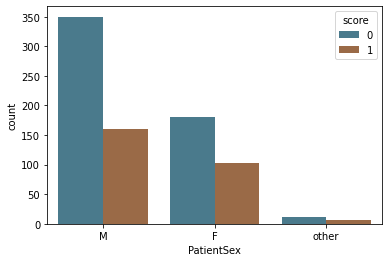

In [ ]:
by_sex = sns.countplot(x="PatientSex", hue="score", data=df, palette=aq_palette)

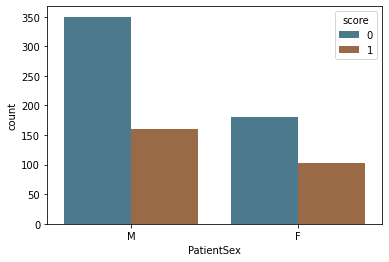

In [ ]:
by_sex = sns.countplot(x="PatientSex", hue="score", data=df[df.PatientSex.isin(['M', 'F'])], palette=aq_palette)

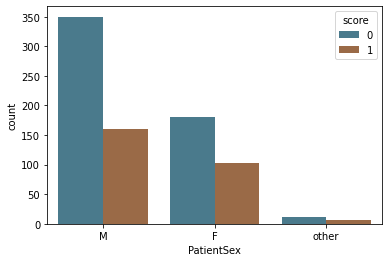

In [ ]:
by_sex = sns.countplot(x="PatientSex", hue="score", data=df, palette=aq_palette)

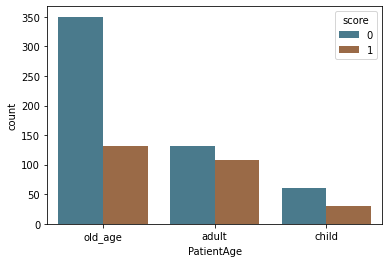

In [ ]:
by_age = sns.countplot(x="PatientAge", hue="score", data=df, palette=aq_palette)

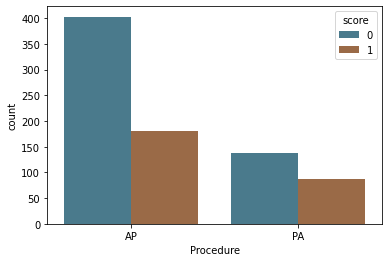

In [ ]:
by_procedure = sns.countplot(x="Procedure", hue="score", data=df, palette=aq_palette)

**Based on Label_value**




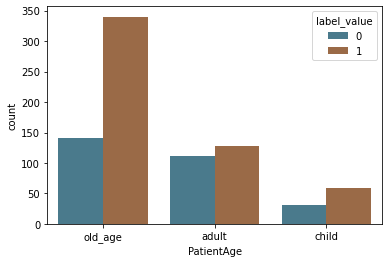

In [ ]:
label_by_age = sns.countplot(x="PatientAge", hue="label_value",  data=df[df.PatientAge.isin(['old_age', 'adult' , 'child'])], palette=aq_palette)

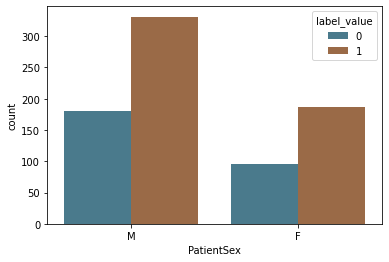

In [ ]:
label_by_sex = sns.countplot(x="PatientSex", hue="label_value", data=df[df.PatientSex.isin(['M', 'F'])], palette=aq_palette)

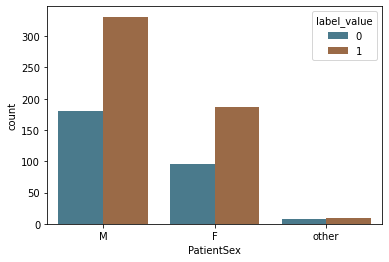

In [ ]:
label_by_sex = sns.countplot(x="PatientSex", hue="label_value", data=df, palette=aq_palette)

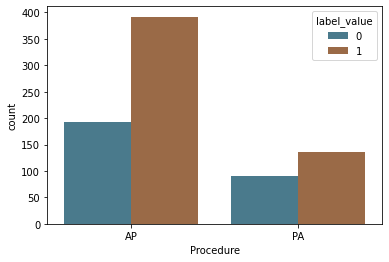

In [ ]:
label_by_procedure = sns.countplot(x="Procedure", hue="label_value", data=df[df.Procedure.isin(['other', 'PA' , 'AP'])], palette=aq_palette)


# Biases?


The **`get_crosstabs()`** method tabulates a confusion matrix for each subgroup and calculates commonly used metrics such as false positive rate and false omission rate. It also provides counts by group and group prevelances.

Group Counts Calculated:

| Count Type | Column Name |
| --- | --- |
| False Positive Count | 'fp' |
| False Negative Count | 'fn' |
| True Negative Count | 'tn' |
| True Positive Count | 'tp' |
| Predicted Positive Count | 'pp' |
| Predicted Negative Count | 'pn' |
| Count of Negative Labels in Group | 'group_label_neg' |
| Count of Positive Labels in Group | 'group_label_pos' | 
| Group Size | 'group_size'|
| Total Entities | 'total_entities' |

Absolute Metrics Calculated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate | 'tpr' |
| True Negative Rate | 'tnr' |
| False Omission Rate | 'for' |
| False Discovery Rate | 'fdr' |
| False Positive Rate | 'fpr' |
| False Negative Rate | 'fnr' |
| Negative Predictive Value | 'npv' |
| Precision | 'precision' |
| Predicted Positive Ratio$_k$ | 'ppr' |
| Predicted Positive Ratio$_g$ | 'pprev' |
| Group Prevalence | 'prev' |


- Predicted Positive Group Rate Disparity (pprev), 
- Predicted Positive Rate Disparity (ppr),  
- False Discovery Rate (fdr), 
- False Omission Rate (for)
- False Positive Rate (fpr)
- False Negative Rate (fnr)

In [ ]:
#from aequitas.preprocessing import preprocess_input_df
#df, _ = preprocess_input_df(df)
g = Group()
xtab, _ = g.get_crosstabs(df)

xtab.round(2)

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,269,Procedure,AP,0.15,0.36,0.83,0.68,0.64,0.85,0.17,0.32,181,403,0.67,0.31,123,334,69,58,392,192,584,810,0.67
1,0,binary 0/1,269,Procedure,PA,0.13,0.22,0.86,0.81,0.78,0.87,0.14,0.19,88,138,0.33,0.39,71,118,20,17,135,91,226,810,0.60
2,0,binary 0/1,269,PatientAge,adult,0.16,0.22,0.82,0.81,0.78,0.84,0.18,0.19,108,131,0.40,0.45,87,107,24,21,128,111,239,810,0.54
3,0,binary 0/1,269,PatientAge,child,0.08,0.19,0.90,0.83,0.81,0.92,0.10,0.17,30,60,0.11,0.33,25,54,6,5,59,31,90,810,0.66
4,0,binary 0/1,269,PatientAge,old_age,0.14,0.42,0.83,0.63,0.58,0.86,0.17,0.37,131,350,0.49,0.27,82,291,59,49,340,141,481,810,0.71
5,0,binary 0/1,269,PatientSex,F,0.18,0.28,0.85,0.68,0.72,0.82,0.15,0.32,102,180,0.38,0.36,69,153,27,33,186,96,282,810,0.66
6,0,binary 0/1,269,PatientSex,M,0.12,0.33,0.83,0.75,0.67,0.88,0.17,0.25,161,350,0.60,0.32,120,290,60,41,331,180,511,810,0.65
7,0,binary 0/1,269,PatientSex,other,0.10,0.29,0.82,0.83,0.71,0.90,0.18,0.17,6,11,0.02,0.35,5,9,2,1,10,7,17,810,0.59


In [ ]:
#### Choosing few metrics
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[[col for col in xtab.columns if col not in absolute_metrics]]  #View calculated counts across sample population groups

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,269,Procedure,AP,181,403,123,334,69,58,392,192,584,810
1,0,binary 0/1,269,Procedure,PA,88,138,71,118,20,17,135,91,226,810
2,0,binary 0/1,269,PatientAge,adult,108,131,87,107,24,21,128,111,239,810
3,0,binary 0/1,269,PatientAge,child,30,60,25,54,6,5,59,31,90,810
4,0,binary 0/1,269,PatientAge,old_age,131,350,82,291,59,49,340,141,481,810
5,0,binary 0/1,269,PatientSex,F,102,180,69,153,27,33,186,96,282,810
6,0,binary 0/1,269,PatientSex,M,161,350,120,290,60,41,331,180,511,810
7,0,binary 0/1,269,PatientSex,other,6,11,5,9,2,1,10,7,17,810


In [ ]:
#View calculated absolute metrics for each sample population group
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Procedure,AP,0.15,0.36,0.83,0.68,0.64,0.85,0.17,0.32,0.67,0.31,0.67
1,Procedure,PA,0.13,0.22,0.86,0.81,0.78,0.87,0.14,0.19,0.33,0.39,0.60
2,PatientAge,adult,0.16,0.22,0.82,0.81,0.78,0.84,0.18,0.19,0.40,0.45,0.54
3,PatientAge,child,0.08,0.19,0.90,0.83,0.81,0.92,0.10,0.17,0.11,0.33,0.66
4,PatientAge,old_age,0.14,0.42,0.83,0.63,0.58,0.86,0.17,0.37,0.49,0.27,0.71
5,PatientSex,F,0.18,0.28,0.85,0.68,0.72,0.82,0.15,0.32,0.38,0.36,0.66
6,PatientSex,M,0.12,0.33,0.83,0.75,0.67,0.88,0.17,0.25,0.60,0.32,0.65
7,PatientSex,other,0.10,0.29,0.82,0.83,0.71,0.90,0.18,0.17,0.02,0.35,0.59


### Visualize bias in model?
The charts below display the default group metrics calculated across each attribute, **colored based on number of samples in the attribute group**

In [ ]:
aqp = Plot()

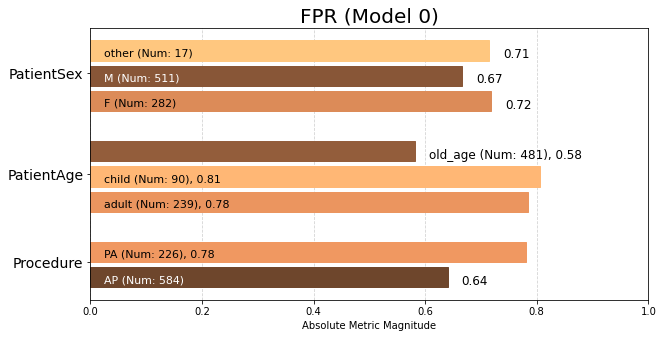

In [ ]:
#Visualizing a single absolute group metric across all population groups
fnr = aqp.plot_group_metric(xtab, 'fpr')

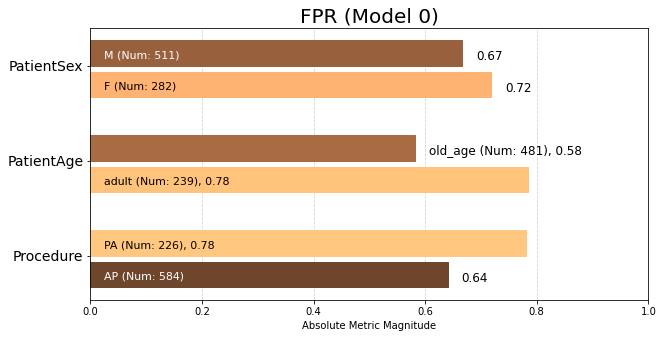

In [ ]:
#View group metrics for only groups over a certain size threshold

fnr = aqp.plot_group_metric(xtab, 'fpr', min_group_size=0.05)

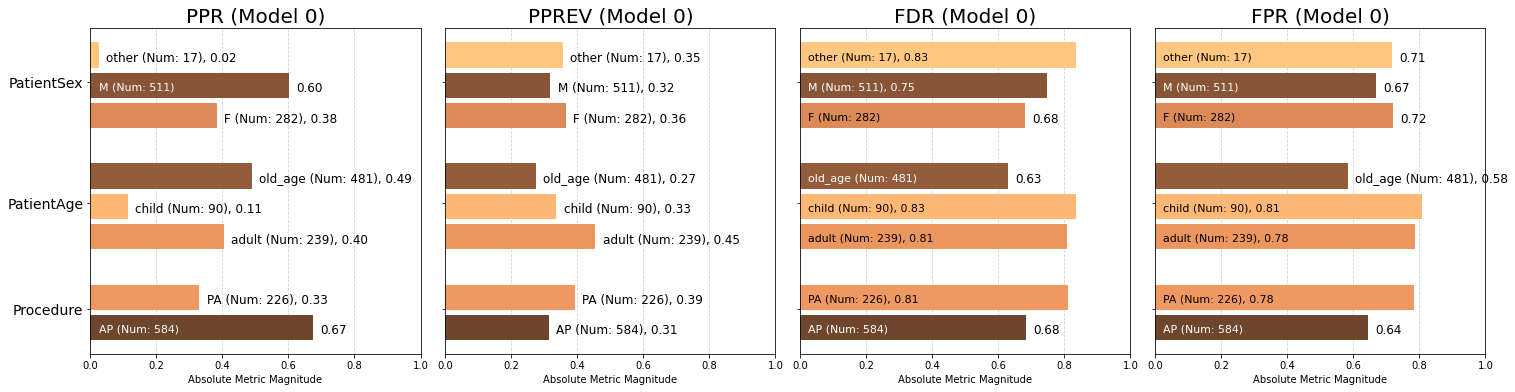

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualizing multiple user-specified absolute group metrics across all population groups
p = aqp.plot_group_metric_all(xtab, metrics=['ppr','pprev','fdr','fpr'], ncols=4)

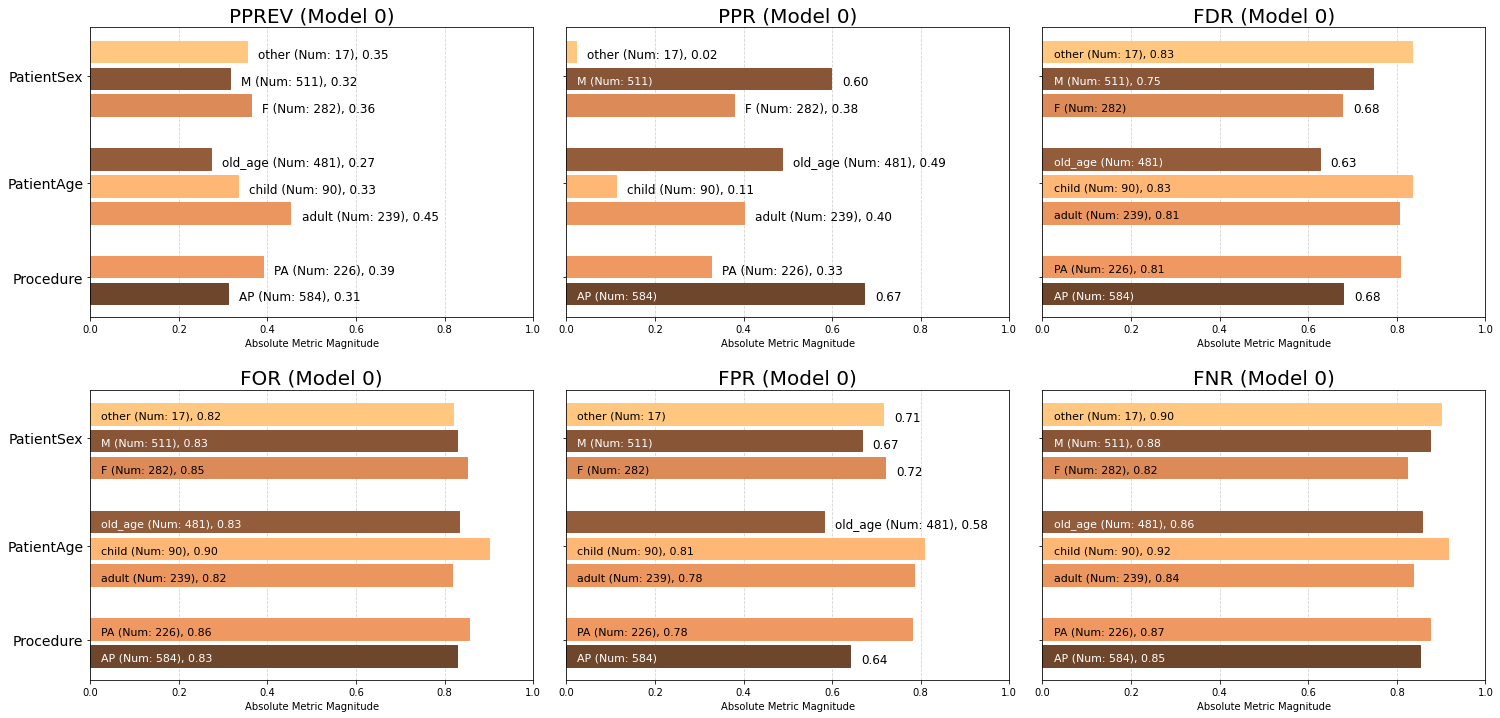

<Figure size 432x288 with 0 Axes>

In [ ]:
#**Visualizing default absolute group metrics across all population groups**
a = aqp.plot_group_metric_all(xtab, ncols=3)

# Disparity?


$$Disparity_{FNR} =  \frac{FNR_{black}}{FNR_{white}}$$ 

Disparities Calculated Calcuated:

| Metric | Column Name |
| --- | --- |
| True Positive Rate Disparity | 'tpr_disprity' |
| True Negative Rate | 'tnr_disparity' |
| False Omission Rate | 'for_disparity' |
| False Discovery Rate | 'fdr_disparity' |
| False Positive Rate | 'fpr_disparity' |
| False NegativeRate | 'fnr_disparity' |
| Negative Predictive Value | 'npv_disparity' |
| Precision Disparity | 'precision_disparity' |
| Predicted Positive Ratio$_k$ Disparity | 'ppr_disparity' |
| Predicted Positive Ratio$_g$ Disparity | 'pprev_disparity' |


In [ ]:
b = Bias()

In [ ]:
#Disparities calculated in relation to a user-specified group for each attribute
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'PatientAge':'adult', 'PatientSex':'M', 'Procedure':'AP'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True).round(2)
bdf #.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,269,Procedure,AP,0.15,0.36,0.83,0.68,0.64,0.85,0.17,0.32,181,403,0.67,0.31,123,334,69,58,392,192,584,810,0.67,False,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False,1.00,AP,False
1,0,binary 0/1,269,Procedure,PA,0.13,0.22,0.86,0.81,0.78,0.87,0.14,0.19,88,138,0.33,0.39,71,118,20,17,135,91,226,810,0.60,False,True,1.19,AP,True,1.03,AP,False,1.03,AP,False,1.22,AP,True,0.85,AP,False,0.49,AP,True,1.26,AP,True,0.60,AP,True,0.61,AP,True,0.85,AP,False
2,0,binary 0/1,269,PatientAge,adult,0.16,0.22,0.82,0.81,0.78,0.84,0.18,0.19,108,131,0.40,0.45,87,107,24,21,128,111,239,810,0.54,False,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False,1.00,adult,False
3,0,binary 0/1,269,PatientAge,child,0.08,0.19,0.90,0.83,0.81,0.92,0.10,0.17,30,60,0.11,0.33,25,54,6,5,59,31,90,810,0.66,False,False,1.03,adult,False,1.09,adult,False,1.10,adult,False,1.03,adult,False,0.55,adult,False,0.28,adult,False,0.74,adult,False,0.86,adult,False,0.90,adult,False,0.52,adult,False
4,0,binary 0/1,269,PatientAge,old_age,0.14,0.42,0.83,0.63,0.58,0.86,0.17,0.37,131,350,0.49,0.27,82,291,59,49,340,141,481,810,0.71,True,True,0.78,adult,True,1.02,adult,False,1.02,adult,False,0.74,adult,True,0.92,adult,False,1.21,adult,True,0.60,adult,True,1.92,adult,True,1.94,adult,True,0.88,adult,False
5,0,binary 0/1,269,PatientSex,F,0.18,0.28,0.85,0.68,0.72,0.82,0.15,0.32,102,180,0.38,0.36,69,153,27,33,186,96,282,810,0.66,False,False,0.91,M,False,0.94,M,False,1.03,M,False,1.08,M,False,0.88,M,False,0.63,M,False,1.15,M,False,1.27,M,False,0.84,M,False,1.43,M,False
6,0,binary 0/1,269,PatientSex,M,0.12,0.33,0.83,0.75,0.67,0.88,0.17,0.25,161,350,0.60,0.32,120,290,60,41,331,180,511,810,0.65,False,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False,1.00,M,False
7,0,binary 0/1,269,PatientSex,other,0.10,0.29,0.82,0.83,0.71,0.90,0.18,0.17,6,11,0.02,0.35,5,9,2,1,10,7,17,810,0.59,False,False,1.12,M,False,1.03,M,False,0.99,M,False,1.07,M,False,1.06,M,False,0.04,M,False,1.12,M,False,0.65,M,False,0.86,M,False,0.81,M,False


In [ ]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].round(2) #.style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,Procedure,AP,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,False,False,False,False,False,False,False,False,False,False,False,False
1,Procedure,PA,1.19,1.03,1.03,1.22,0.85,0.49,1.26,0.60,0.61,0.85,False,True,True,False,False,True,False,True,True,True,True,False
2,PatientAge,adult,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,False,False,False,False,False,False,False,False,False,False,False,False
3,PatientAge,child,1.03,1.09,1.10,1.03,0.55,0.28,0.74,0.86,0.90,0.52,False,False,False,False,False,False,False,False,False,False,False,False
4,PatientAge,old_age,0.78,1.02,1.02,0.74,0.92,1.21,0.60,1.92,1.94,0.88,True,True,True,False,False,True,False,True,True,True,True,False
5,PatientSex,F,0.91,0.94,1.03,1.08,0.88,0.63,1.15,1.27,0.84,1.43,False,False,False,False,False,False,False,False,False,False,False,False
6,PatientSex,M,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,False,False,False,False,False,False,False,False,False,False,False,False
7,PatientSex,other,1.12,1.03,0.99,1.07,1.06,0.04,1.12,0.65,0.86,0.81,False,False,False,False,False,False,False,False,False,False,False,False


Aequitas can automate base group selection based on dataset characterisitcs:

In [ ]:
#Evaluating disparities calculated in relation to a different reference group
hbdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                         ref_groups_dict={'PatientAge':'adult', 'PatientSex':'M', 'Procedure':'AP'},
                                         alpha=0.05, check_significance=True,  mask_significance=False, 
                                         selected_significance=['fpr', 'for', 'fdr'])
# View disparity metrics added to dataframe
hbdf[['attribute_name', 'attribute_value'] +  
     b.list_disparities(hbdf) + b.list_significance(hbdf)].round(2)

get_disparity_predefined_group()


,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,for_significance,fpr_significance
0,Procedure,AP,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,Procedure,PA,1.19,1.03,1.03,1.22,0.85,0.49,1.26,0.60,0.61,0.85,0.05,0.04,0.02,0.47,0.02
2,PatientAge,adult,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,PatientAge,child,1.03,1.09,1.10,1.03,0.55,0.28,0.74,0.86,0.90,0.52,0.05,0.05,0.73,0.14,0.73
4,PatientAge,old_age,0.78,1.02,1.02,0.74,0.92,1.21,0.60,1.92,1.94,0.88,0.00,0.00,0.00,0.71,0.00
5,PatientSex,F,0.91,0.94,1.03,1.08,0.88,0.63,1.15,1.27,0.84,1.43,0.74,0.18,0.23,0.53,0.23
6,PatientSex,M,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,PatientSex,other,1.12,1.03,0.99,1.07,1.06,0.04,1.12,0.65,0.86,0.81,0.61,0.74,0.63,0.93,0.63


In [ ]:
#Disparities calculated in relation to sample population majority group (in terms of group prevalence) for each attribute
majority_bdf = b.get_disparity_major_group(xtab, original_df=df)

majority_bdf[['attribute_name', 'attribute_value'] +  b.list_disparities(majority_bdf)].round(2)

get_disparity_major_group()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Procedure,AP,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,Procedure,PA,0.49,1.26,0.60,1.19,1.03,1.22,1.03,0.85,0.61,0.85
2,PatientAge,adult,0.82,1.66,0.52,1.29,0.98,1.35,0.98,1.14,0.52,1.09
3,PatientAge,child,0.23,1.22,0.45,1.33,1.08,1.39,1.07,0.59,0.46,0.59
4,PatientAge,old_age,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,PatientSex,F,0.63,1.15,1.27,0.91,1.03,1.08,0.94,1.43,0.84,0.88
6,PatientSex,M,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,PatientSex,other,0.04,1.12,0.65,1.12,0.99,1.07,1.03,0.81,0.86,1.06


In [ ]:
#Disparities calculated in relation to the minimum value for each metric
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=df,
                                            check_significance=False).round(2)
min_metric_bdf #.styal

get_disparity_min_metric()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,fdr_disparity,fdr_ref_group_value,for_disparity,for_ref_group_value,fpr_disparity,fpr_ref_group_value,fnr_disparity,fnr_ref_group_value,tpr_disparity,tpr_ref_group_value,tnr_disparity,tnr_ref_group_value,npv_disparity,npv_ref_group_value
0,0,binary 0/1,269,Procedure,AP,0.15,0.36,0.83,0.68,0.64,0.85,0.17,0.32,181,403,0.67,0.31,123,334,69,58,392,192,584,810,0.67,2.06,PA,1.00,AP,1.66,PA,1.00,AP,1.00,AP,1.00,AP,1.00,AP,1.17,PA,1.64,PA,1.18,PA
1,0,binary 0/1,269,Procedure,PA,0.13,0.22,0.86,0.81,0.78,0.87,0.14,0.19,88,138,0.33,0.39,71,118,20,17,135,91,226,810,0.60,1.00,PA,1.26,AP,1.00,PA,1.19,AP,1.03,AP,1.22,AP,1.03,AP,1.00,PA,1.00,PA,1.00,PA
2,0,binary 0/1,269,PatientAge,adult,0.16,0.22,0.82,0.81,0.78,0.84,0.18,0.19,108,131,0.40,0.45,87,107,24,21,128,111,239,810,0.54,3.60,child,1.66,old_age,1.17,child,1.29,old_age,1.00,adult,1.35,old_age,1.00,adult,1.94,child,1.12,child,1.83,child
3,0,binary 0/1,269,PatientAge,child,0.08,0.19,0.90,0.83,0.81,0.92,0.10,0.17,30,60,0.11,0.33,25,54,6,5,59,31,90,810,0.66,1.00,child,1.22,old_age,1.00,child,1.33,old_age,1.10,adult,1.39,old_age,1.09,adult,1.00,child,1.00,child,1.00,child
4,0,binary 0/1,269,PatientAge,old_age,0.14,0.42,0.83,0.63,0.58,0.86,0.17,0.37,131,350,0.49,0.27,82,291,59,49,340,141,481,810,0.71,4.37,child,1.00,old_age,2.24,child,1.00,old_age,1.02,adult,1.00,old_age,1.02,adult,1.70,child,2.16,child,1.69,child
5,0,binary 0/1,269,PatientSex,F,0.18,0.28,0.85,0.68,0.72,0.82,0.15,0.32,102,180,0.38,0.36,69,153,27,33,186,96,282,810,0.66,17.00,other,1.15,M,1.94,other,1.00,F,1.04,other,1.08,M,1.00,F,1.77,other,1.00,F,1.00,F
6,0,binary 0/1,269,PatientSex,M,0.12,0.33,0.83,0.75,0.67,0.88,0.17,0.25,161,350,0.60,0.32,120,290,60,41,331,180,511,810,0.65,26.83,other,1.00,M,1.53,other,1.10,F,1.01,other,1.00,M,1.07,F,1.24,other,1.19,F,1.14,F
7,0,binary 0/1,269,PatientSex,other,0.10,0.29,0.82,0.83,0.71,0.90,0.18,0.17,6,11,0.02,0.35,5,9,2,1,10,7,17,810,0.59,1.00,other,1.12,M,1.00,other,1.23,F,1.00,other,1.07,M,1.09,F,1.00,other,1.02,F,1.21,F


### Visualize  Disparities in model?


- input >> dataframe from `Bias()` class 
- method >> **`get_disparity_`**
- visualize >>  `Plot()` class:
  - `plot_disparity()`
  - `plot_disparity_all()`


**Reference groups are displayed in grey, and always have a disparity = 1.** Note that disparities greater than 10x reference group will are visualized as 10x, and disparities less than 0.1x reference group are visualized as 0.1x.

Statistical siginificance (at a default value of 0.05) is denoted by two asterisks (**) next to a treemap square's value.

**Note**: Groups are visualized at no less than 0.1 times the size of the reference group, and no more than 10 times the size of the reference group.

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


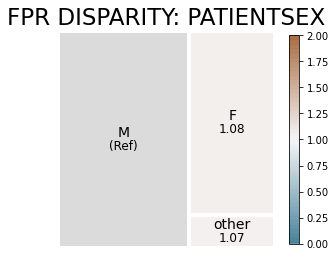

In [ ]:
#Visualizing disparities between groups in a single user-specified attribute for a single user-specified disparity metric
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='PatientSex', significance_alpha=0.05)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


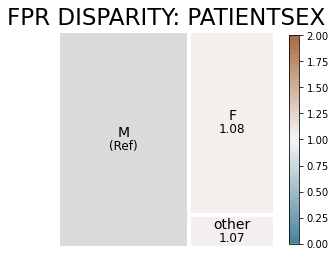

In [ ]:
aqp.plot_disparity(hbdf, group_metric='fpr_disparity', attribute_name='PatientSex', significance_alpha=0.05)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

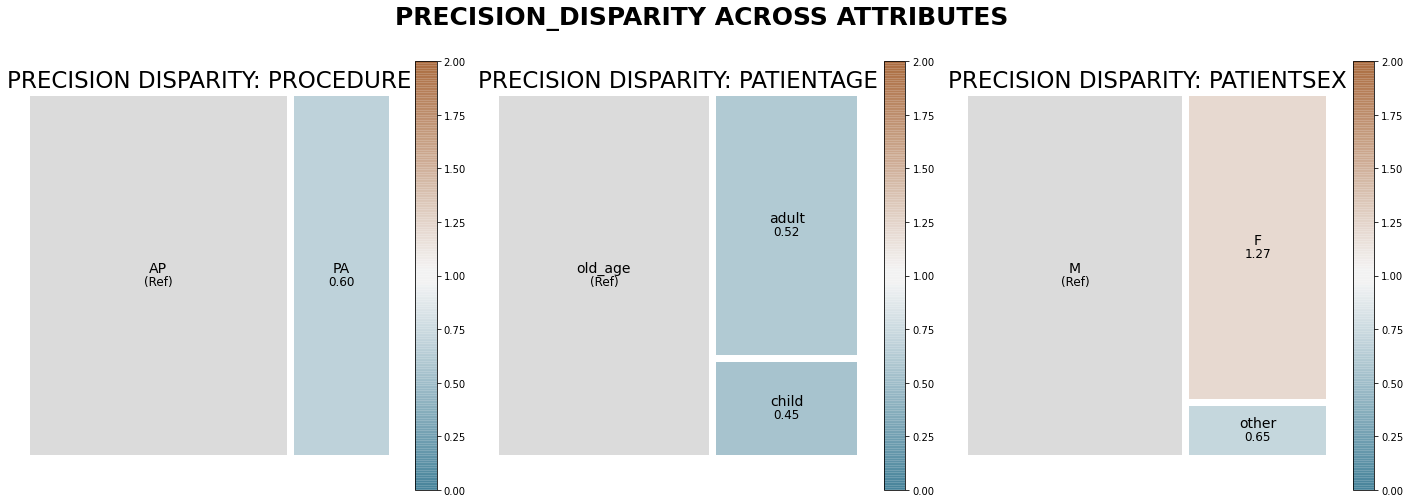

In [ ]:
#Visualizing disparities between all groups for a single user-specified disparity metric
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)

### Visualize Disparities between groups


Disparities Metrics :

| Metric | Column Name |
| --- | --- |
| Predicted Positive Group Rate Disparity | pprev_disparity|
| Predicted Positive Rate Disparity | ppr_disparity|
| False Discovery Rate Disparity | fdr_disparity|
| False Omission Rate Disparity | for_disparity|
| False Positive Rate Disparity | fpr_disparity|
| False Negative Rate Disparity | fnr_disparity|

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

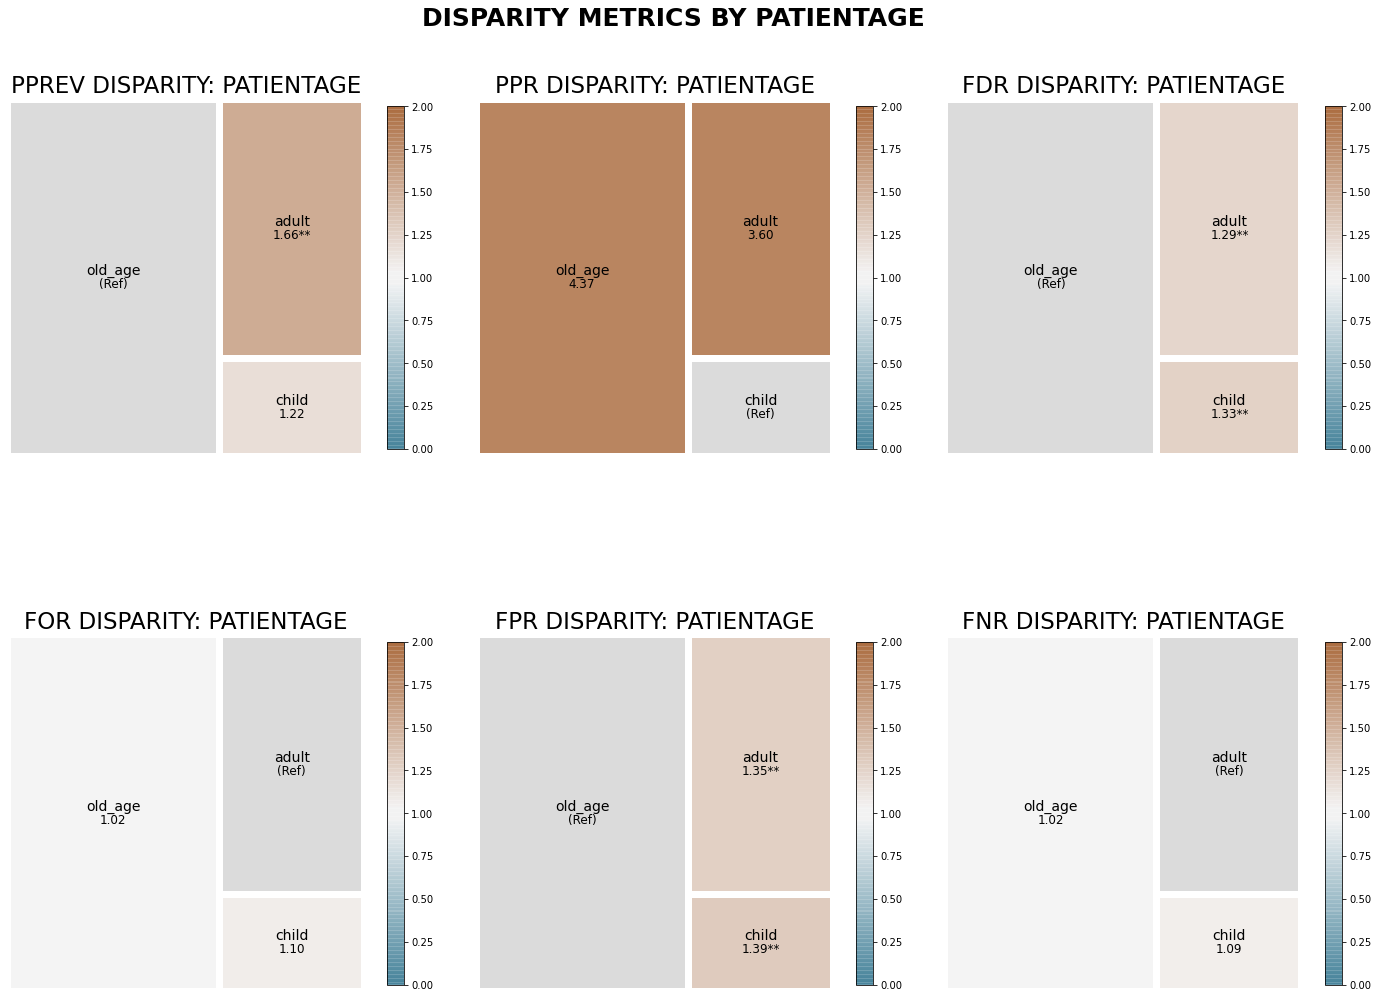

In [ ]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['PatientAge'], significance_alpha=0.05)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

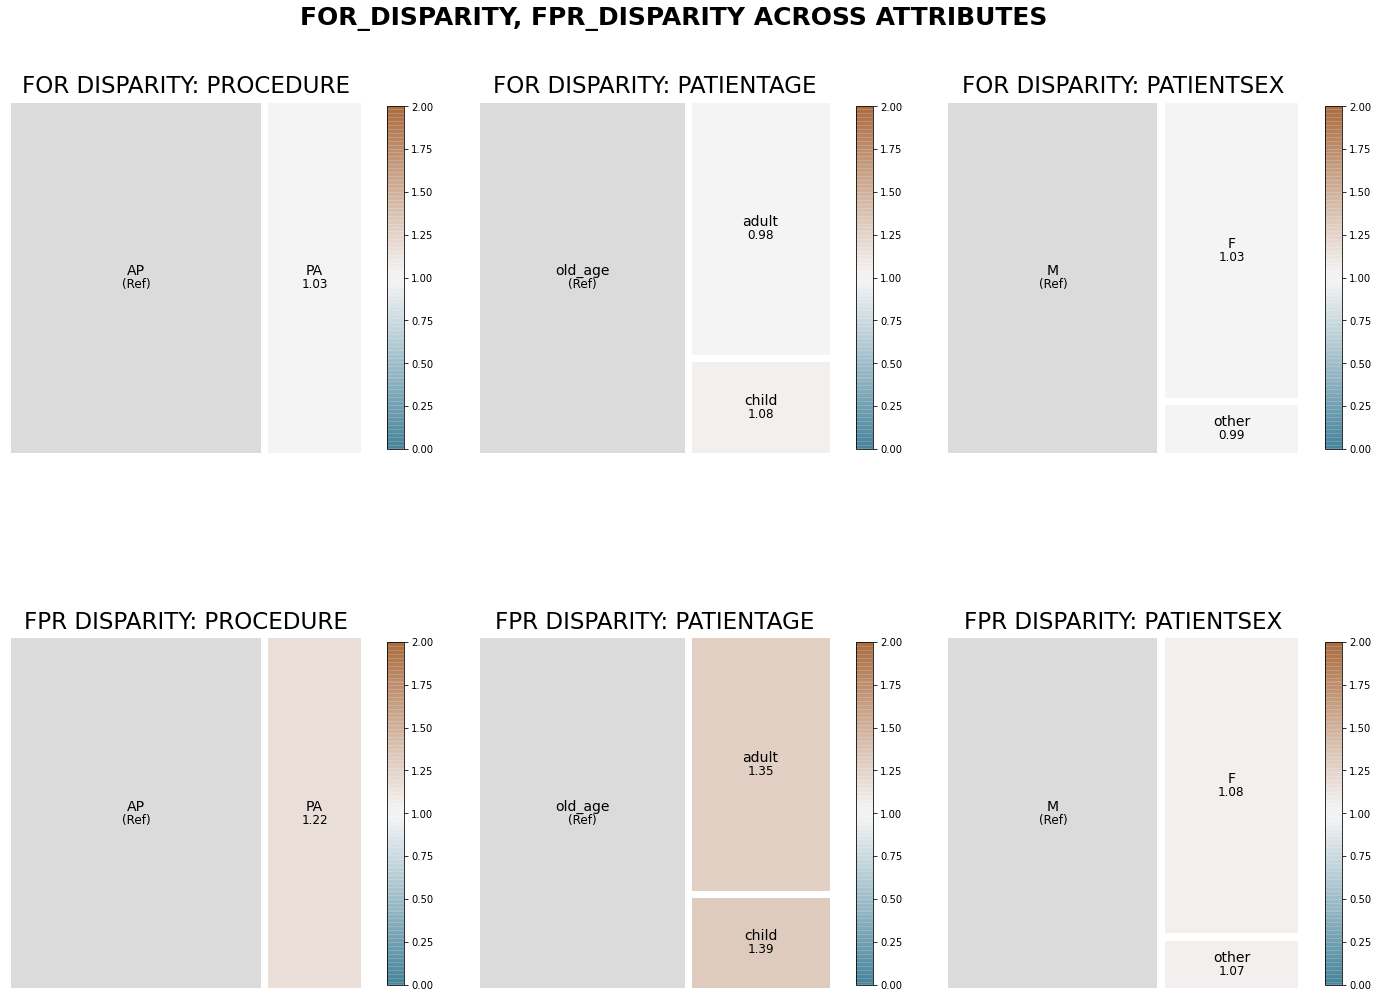

In [ ]:
#Visualizing disparity between all groups for specified disparity metrics
dp = aqp.plot_disparity_all(majority_bdf, metrics=['for_disparity', 'fpr_disparity'], significance_alpha=0.05)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

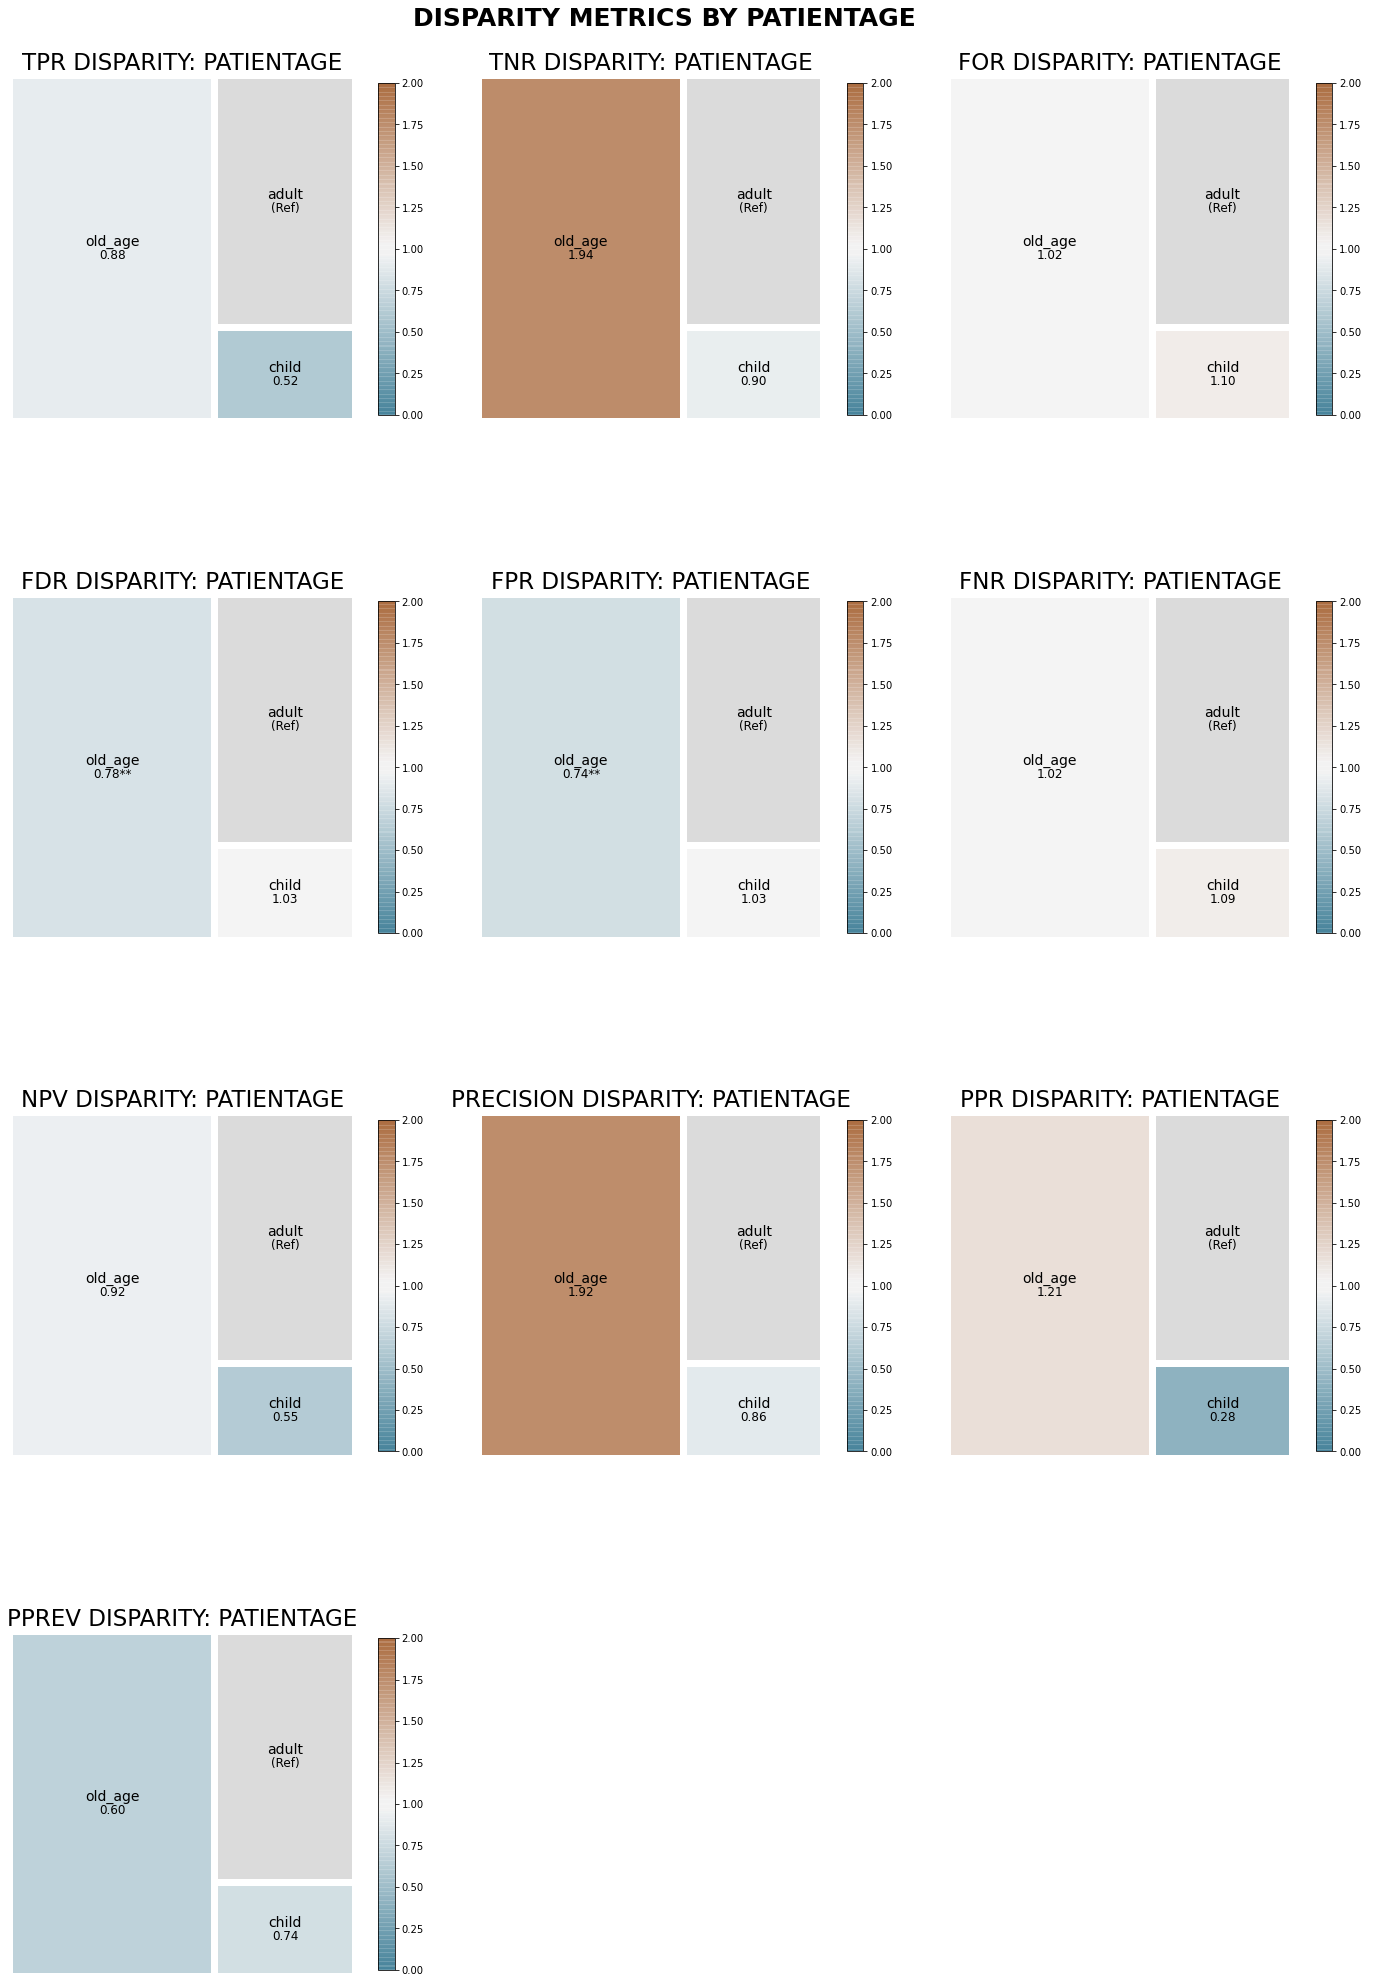

In [ ]:
#Visualizing disparities between groups for all calculated disparity metrics
tm_capped = aqp.plot_disparity_all(hbdf, attributes=['PatientAge'], metrics = 'all', significance_alpha=0.05)

# Fairness?

_Aequitas Fairness() Class_

Using FPR disparity as an example and the default fairness threshold, we have:

$$ 0.8 < Disparity_{FNR} =  \frac{FPR_{group}}{FPR_{base group}} < 1.25 $$ 

### Group Level Fairness
When the `label_value` column is not included in the original data set, Aequitas calculates only Statistical Parity and Impact Parities.

#### Pairities Calcuated:

| Parity | Column Name |
| --- | --- |
| True Positive Rate Parity | 'TPR Parity' |
| True Negative Rate Parity | 'TNR Parity' |
| False Omission Rate Parity | 'FOR Parity' |
| False Discovery Rate Parity | 'FDR Parity' |
| False Positive Rate Parity | 'FPR Parity' |
| False Negative Rate Parity | 'FNR Parity' |
| Negative Predictive Value Parity | 'NPV Parity' |
| Precision Parity | 'Precision Parity' |
| Predicted Positive Ratio$_k$ Parity | 'Statistical Parity' |
| Predicted Positive Ratio$_g$ Parity | 'Impact Parity' |

#### Also assessed:
- **_Type I Parity_**: Fairness in both FDR Parity and FPR Parity
- **_Type II Parity_**: Fairness in both FOR Parity and FNR Parity
- **_Equalized Odds_**: Fairness in both FPR Parity and TPR Parity
- **_Unsupervised Fairness_**: Fairness in both Statistical Parity and Impact Parity
- **_Supervised Fairness_**: Fairness in both Type I and Type II Parity
- **_Overall Fairness_**: Fairness across all parities for all attributes

In [ ]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

The `Fairness()` class includes a method to quickly return a list of fairness determinations from the dataframe returned by the **`get_group_value_fairness()`** method.

In [ ]:
parity_detrminations = f.list_parities(fdf)

In [ ]:
#fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style
fdf[['attribute_name', 'attribute_value'] + absolute_metrics].style
fdf[['attribute_name', 'attribute_value'] +  b.list_disparities(fdf)].style
fdf[['attribute_name', 'attribute_value']  + parity_detrminations].style

In [ ]:
fdf1 = fdf[['attribute_name', 'attribute_value'] + absolute_metrics]
fdf2 = fdf[['attribute_name', 'attribute_value'] +  b.list_disparities(fdf)]
fdf3 = fdf[['attribute_name', 'attribute_value']  + parity_detrminations]

### Attribute Level Fairness


In [ ]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

In [ ]:
gaf2 =  gaf.columns[1:5]

### Overall Fairness
The **`get_overall_fairness()`** function gives a quick boolean assessment of the output of **`get_group_value_fairness()`** or **`get_group_attribute_fairness()`**, returning a dictionary with a determination across all attributes for each of:
- Unsupervised Fairness
- Supervised Fairness
- Overall Fairness

In [ ]:
gof = f.get_overall_fairness(fdf)
gof

# Bias metric parity - Visualization?


colored based on fairness determination for that attribute group 
- green = 'True' 
- red = 'False' 

In [ ]:
#Visualizing parity of a single absolute group metric across all population groups
z = aqp.plot_fairness_group(fdf, group_metric='ppr')

In [ ]:
#Visualizing all absolute group metrics across all population groups
fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")

False Discovery Rate disparity values - based on a predefined reference group 
- colored based on fairness determination for that attribute group 
  - green = 'True'
  - red = 'False'

In [ ]:
#Visualizing parity between groups in a single user-specified attribute for all calculated disparity metrics
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='PatientSex')

Researcher Check: Could the unfairness I am seeing be related to small group sizes in my sample?


---



Use the `min_group` parameter on all visualization methods to vizualize parities for only those sample population groups above a user-specified percentage of the total sample size. Note that only the smallest groups had an 'False' determination for false discovery rate parity above. The parity determination is 'True' for all groups at least 1% of the sample size .

In [ ]:
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='PatientSex', 
                                min_group_size=0.01, significance_alpha=0.05)

Visualizing parity between groups in a single user-specified attribute for all calculated disparity metrics


---


The treemaps below display disparities between race attribute groups calculated based on a predefined reference group ('Caucasian') for all 10 disparity metrics, colored based on fairness determination for that attribute group (green = 'True' and red = 'False').

As all treemap squares are sized and positioned based on group size, the population groups on all subplots are found in the same place across all disparity metrics, allowing for ease of comparison of fairness determinations for each 'race' group across every calculated dipsarity metric.

In [ ]:
#Visualizing parity between groups in a single user-specified attribute for all calculated disparity metrics
a_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['PatientSex'], metrics='all', 
                                       significance_alpha=0.05)

Visualizing parity between all groups for multiple user-specified disparity metrics


---


The treemaps below display Predicted Positive Group Rate (pprev) and Predicted Positive Rate (ppr) disparities between attribute groups for all three attributes (race, sex, age category) calculated based on predefined reference groups ('race' attribute: Caucasian, 'sex' attribute: Male, 'age_cat' attribute: 25-45), colored based on fairness determination for that attribute group (green = 'True' and red = 'False'). As we want to plot for all groups, there is no need to specify any attributes. 

We can see that the Predicted Positive Group Rate Parity (Impact Parity) determination was 'False' for nearly every race in comparison to Caucausians, and 'False' for every other age category in comparison to the 25-45 age group, and that overall Predicted Positive Rate Parity (Statistical Parity) did not have any 'True' fairness determinations at all.

In [ ]:
#Visualizing parity between all groups for multiple user-specified disparity metrics
r_tm = aqp.plot_fairness_disparity_all(fdf, metrics=['pprev_disparity', 'ppr_disparity'], 
                                       significance_alpha=0.05)

Visualizing parity between groups in multiple user-specified attributes


---


The treemaps below display disparities between attribute groups for all two attributes (sex, age category) calculated based on predefined reference groups ('sex' attribute: Male, 'age_cat' attribute: 25-45) for the six default disparity metrics, colored based on fairness determination for that attribute group (green = 'True' and red = 'False'). As we want to see only the default metrics, we do not need to set the 'metrics' parameter. 

Note that there is slightly more parity between the sexes (FNR, FDR, FNR, and Statistical Parity) than between age categories (FDR Parity only).

In [ ]:
#Visualizing parity between groups in multiple user-specified attributes
n_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['PatientSex', 'PatientAge'], 
                                       significance_alpha=0.05)

# Report generation

In [ ]:
!mkdir '/content/result'

In [ ]:
j.savefig('/content/result/j')
min_met.savefig('/content/result/min_met')
tm_capped.savefig('/content/result/tm_capped')
dp.savefig('/content/result/fg')
fg.savefig('/content/result/fg')
a_tm.savefig('/content/result/a_tm')
r_tm.savefig('/content/result/r_tm')
n_tm.savefig('/content/result/n_tm')

In [ ]:
def dataframe_to_image(dataframe , filename ,w ,  transparent= True):
      df = dataframe
      fig, ax = plt.subplots(figsize=(12, 4)) # set size frame
      ax.xaxis.set_visible(False)  # hide the x axis
      ax.yaxis.set_visible(False)  # hide the y axis
      ax.set_frame_on(False)  # no visible frame, uncomment if size is ok

      tabla = table(ax, df, loc='upper right', colWidths=[w]*len(df.columns))  # where df is your data frame

      tabla.auto_set_font_size(False) # Activate set fontsize manually
      tabla.set_fontsize(10) # if ++fontsize is necessary ++colWidths
      #tabla.scale(1, 1.2) # change size table
      plt.savefig('/content/result/' + filename + '.png', transparent= transparent)

In [ ]:
fdf1_1 = fdf1[['attribute_name' ,  	'attribute_value' ,	'tpr'  ,	'tnr' ,	'for' ,	'fdr']]
fdf1_2 = fdf1[[	 'fpr', 'fnr' ,	'npv' ,	'precision' ,  	'ppr' ,  	'pprev' ,  	'prev']]

#dataframe_to_image(fdf1.round(2) , 'fdf1' , transparent= False)
dataframe_to_image(fdf1_1.round(2) , 'fdf1_1' , 0.12 ,  transparent= False)
dataframe_to_image(fdf1_2.round(2) , 'fdf1_2' , 0.08 , transparent= False)

dataframe_to_image(fdf2.round(2) , 'fdf2' , 0.1 ,  transparent= False)

fdf3_1 = fdf3[['attribute_name' ,  	'attribute_value' ,	'Unsupervised Fairness' ,	'TPR Parity' ,	'TypeI Parity' ,	'TypeII Parity' ,	'Impact Parity' ,	'FOR Parity' ]]
fdf3_2 = fdf3[[	'TNR Parity' ,	'Supervised Fairness' ,	'FDR Parity' ,	'Statistical Parity' , 'Equalized Odds' ,	'FNR Parity' , 	'NPV Parity' ,	'Precision Parity' ,	'FPR Parity' ]]

#dataframe_to_image(fdf3.round(2) , 'fdf3' , transparent= False)
dataframe_to_image(fdf3_1.round(2) , 'fdf3_1' , 0.12 ,  transparent= False)
dataframe_to_image(fdf3_2.round(2) , 'fdf3_2' , 0.10 , transparent= False)

#!zip -r 'example.zip' '/content/result'

In [ ]:
#fdf1.append(fdf2)

### Pdf generation

https://pyfpdf.readthedocs.io/en/latest/Tutorial/index.html

In [ ]:
!pip install fpdf

In [ ]:
from fpdf import FPDF

In [ ]:
direc = '/content/result/'
page = 0

pdf = FPDF()

'''pdf.add_page()
pdf.set_font('Arial', 'B', 8)
pdf.cell(1, 1, 'Hello World!')
start_y = 5
height = 60
pdf.image(direc + 'fdf1_1.png' ,0,start_y,200,height , )
start_y = start_y + height 
pdf.image(direc + 'fdf1_2.png' ,0,start_y,250,height)
pdf.cell(5, 65, 'Hello World!')
start_y = start_y + height 
pdf.image(direc + 'fdf2.png' ,0 ,start_y,250,height)
start_y = start_y + height 
pdf.image(direc + 'fdf3_1.png' ,0, start_y,250,height)
start_y = start_y + height 
pdf.image(direc + 'fdf3_2.png' ,0, start_y,250,height)
page += 1
print('page' , page)'''

#metrics
pdf.add_page()
pdf.image(direc + 'fg.png' ,0,5,200,190)

page += 1
print('page' , page)

pdf.add_page()
pdf.image(direc + 'j.png' ,0,5,200,70)
pdf.image(direc + 'min_met.png' ,0,100,200,150)
page += 1
print('page' , page)

#disparity age
pdf.add_page()
pdf.image(direc + 'tm_capped.png' ,0,5,200,250)
page += 1
print('page' , page)

#disparity sex
pdf.add_page()
pdf.image(direc + 'a_tm.png' ,0,5,200,250)
page += 1
print('page' , page)

pdf.add_page()
pdf.image(direc + 'n_tm.png' ,0,5,200,250)
page += 1
print('page' , page)

pdf.add_page()
pdf.image(direc + 'r_tm.png' ,0,5,200,110)
page += 1
print('page' , page)

pdf.output("Report12673.pdf", "F")